# **Insper - Eletromagnetismo e Ondulatória** #


**Projeto WPT**

<p style='text-align: justify;'>Uma das tecnologias mais utilizadas para a transferência de energia pelo ar – WPT (Wireless Power Transfer) – consiste no chamado “acoplamento ressonante por campos próximos – near field ressonant coupling”. Como há duas bobinas (uma transmissora e outra receptora), o fenômeno da transmissão de energia pelo ar se assemelha bastante ao funcionamento de um transformador convencional. Exatamente por isso, e para nossa sorte, é possível utilizar o modelo elétrico do transformador para simular um circuito WPT.</p>
<br>
<br>
<div>  
<img src="attachment:image.png" align="center" width="300"/>      
</div>
<br>

<p style='text-align: justify;'>Uma importante diferença entre um transformador com núcleo de ferro e um outro sem esse núcleo (como no caso da transmissão pelo ar) é que a intensidade do campo magnético produzido pela bobina primária, por exemplo, não será igual à intensidade do campo magnético no interior da bobina secundária, hipótese que usamos para construir o modelo do transformador. Contudo, a engenharia é conhecida exatamente pela engenhosidade das soluções encontradas, não é mesmo?
Em um transformador convencional, a indutância mútua é calculada usando $M=\sqrt {L_1\cdot L_2}$. A definição de indutância mútua consiste na razão entre o fluxo magnético total em uma bobina e a corrente na outra. Ora, se apenas parte do fluxo magnético produzido por uma das bobinas chega à outra, nada mais simples do que considerar um “fator de acoplamento k”, de tal modo que $M=k\cdot \sqrt {L_1\cdot L_2}$. Esse fator de acoplamento pode variar entre 0 e 1, sendo 1 apenas quando há um núcleo de ferro entre as bobinas.</p>

Mesmo sem sabermos a relação entre $k$ e a distância entre as bobinas, sabemos, intuitivamente, que quanto maior a distância, menor será o $k$. Considere o modelo do transformador abaixo para responder aos itens que seguem.
<br>
<br>

<div>
<img src="attachment:image-3.png" align="center" width="500"/>
</div>





a) Importe os módulos necessários

In [14]:
#Vamos importar os módulos que precisamos
from math import *
from cmath import *
from numpy import linalg
import numpy as np
import matplotlib.pyplot as plt

b) Declare as variáveis do transformador: $R_1=0,5\Omega$, $R_2=0,5\Omega$, $L_1=300 mH$, $L_2=300 mH$, $freq=60Hz$ e $k=0,5$

In [15]:
#implemente seu código aqui
R1 = R2 = 0.5
L1 = L2 = 300e-6
C1 = C2 = 0.1e-6
RC = 400
f = 1/(2*pi*sqrt(L1*C1))
k = 0.5

c) Calcule na célula abaixo:

- Frequência angular
- Indutância Mútua
- Reatâncias indutivas de $L_1$ e $L_2$
- Reatância indutiva mútua

Obsrvação: o número complexo $j=\sqrt{-1}$ é nativo da linguagem Python. Para escrever $j$, digite "1j"


In [16]:
#implemente seu código aqui
w = 2*pi*f
M = k*sqrt(L1*L2)

XL1 = w * L1 * 1j
XL2 = w * L2 * 1j

XC1 = 1/(w * C1 * 1j)
XC2 = 1/(w * C2 * 1j)

XM = w * M * 1j

RC_LINHA = (RC * XC1)/(RC + XC1)

print("W = ", w)
print("M = ", M)
print("XL1 = ", XL1)
print("XL2 = ", XL2)
print("XC1 = ", XC1)
print("XC2 = ", XC2)
print("XM = ", XM)
print("RC_LINHA = ", RC_LINHA)

W =  (182574.1858350554+0j)
M =  (0.00015+0j)
XL1 =  54.772255750516614j
XL2 =  54.772255750516614j
XC1 =  -54.7722557505166j
XC2 =  -54.7722557505166j
XM =  27.386127875258307j
RC_LINHA =  (7.361963190184045-53.76417742381997j)


d) Observe mais uma vez a função que criamos para calcular as correntes $i_1$ e $i_2$. Ela é a mesma que usamos na aula sobre transformadores e também no Lab2.

In [17]:
def CalcularTransformador(v1, RC_LINHA):
    Z=np.array([[R1+XL1+XC1, -XM],[-XM, XL2+R2+RC_LINHA]])
    V=np.array([v1,0])
    I=np.dot(linalg.inv(Z),V)
    return I[0], I[1]

e) Agora calcule as correntes $i_1$, $i_2$ e $V_2$ para:

- $V_1(t)=50\cdot cos(\omega \cdot t)\space [V]$
- $Rc=10\space \Omega$


In [18]:
#implemente seu código aqui
V1 = 50
I1, I2 = CalcularTransformador(V1, RC_LINHA)
V2 = I2 * RC_LINHA
print("V2 = ", V2)
print("I2 = ", I2)

V2 =  (97.65660289924392+13.305674868701749j)
I2 =  (0.0012142316341918161+1.8162216637464317j)


f) Agora faça uma estrutura de loop para variar $k$ entre $0$ e $1$, calculando $V_2$ para cada $k$. Plote um gráfico de $V_2\space x \space k$. Qual a sua conclusão sobre o gráfico?

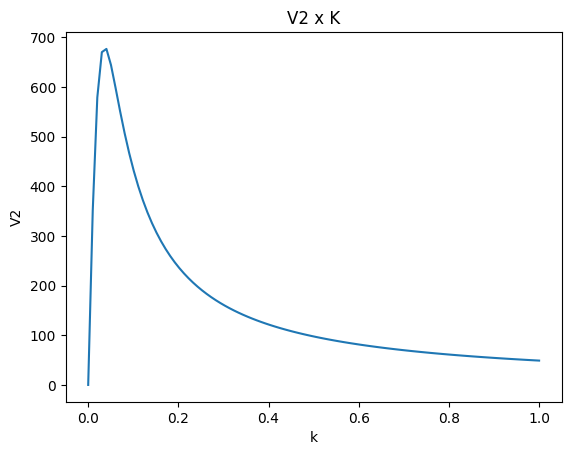

In [19]:
#implemente seu código aqui
k_list = np.linspace(0, 1, 100)

V2_list = []
for k in k_list:
    M = k*sqrt(L1*L2)
    XM = k*sqrt(XL1*XL2)
    I1, I2 = CalcularTransformador(V1, RC_LINHA)
    V2 = I2 * RC_LINHA
    V2_list.append(V2)
plt.plot(k_list, V2_list)
plt.title("V2 x K")
plt.xlabel("k")
plt.ylabel("V2")
plt.show()